In [1]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/OneDrive/Documents/Injury Dataset/2013-2022/2018-2022 Data Cleaned Trainable.csv')
data = pd.DataFrame(dataset.iloc[:,:22])
print(data.STATE)

X = pd.DataFrame(dataset.iloc[:,:22].values)
Y = np.array(pd.DataFrame(dataset.iloc[:,22:].values))
Y = Y.reshape(-1)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

0        1
1        1
2        1
3        1
4        1
        ..
44090    2
44091    2
44092    2
44093    2
44094    2
Name: STATE, Length: 44095, dtype: int64
       0   1   2   3   4   5   6   7   8   9   ...  12  13  14   15  16  17  \
0       1   1   1   1   0   1   3  55   1   1  ...   0   0   1    0   0   1   
1       1   1   1   1   0   1   0  16   1   1  ...   0   0   1    0   0   1   
2       1   1   1   1   3   0   3  41   1   1  ...   0   1   1    0   1   1   
3       1   1   2   2   3   0   0  21   2   1  ...   0   0   1    0   0   1   
4       1   1   2   1   3   0   1  66   1   1  ...   0   0   1  174   0   1   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..  ..   
44090   2   4   1   2   0   1   0  53   1   1  ...   1   0   1    0   0   1   
44091   2   4   1   2   0   1   2  27   1   1  ...   1   0   1    0   1   1   
44092   2   4   1   2   1   0   1  25   1   1  ...   1   1   1  155   0   1   
44093   2   4   1   2   1   0   1  21   2   1  .

In [2]:
features = pd.DataFrame(dataset.iloc[:,:32])
features = features.columns
print(features)

Index(['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP',
       'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG',
       'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ',
       'RUR_URB', 'FUNC_SYS', 'IMPACT1', 'INJ_SEV'],
      dtype='object')


In [ ]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
import optuna
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np


c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", [None, 'sqrt', 'log2'])

    base_estimator = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features
    )
    
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 2.0, log=True)

    clf = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train, Y_train, cv=cv, scoring='accuracy')

    return np.mean(scores)

study = optuna.create_study(study_name = "Adaboost", direction="maximize",storage="sqlite:///adaboost.db")
study.optimize(objective, n_trials=50)

print("Best Accuracy:", study.best_value)
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

c:\Users\eddie\anaconda3\envs\SSTP-Injury\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-30 18:03:05,660] A new study created in RDB with name: Adaboost
[I 2025-05-30 18:03:11,029] Trial 0 finished with value: 0.9209661173706429 and parameters: {'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': None, 'n_estimators': 75, 'learning_rate': 0.5373016303489795}. Best is trial 0 with value: 0.9209661173706429.
[I 2025-05-30 18:03:58,593] Trial 1 finished with value: 0.9067355255355153 and parameters: {'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 20, 'max_features': None, 'n_estimators': 240, 'learning_rate': 0.5085426613130227}. Best is trial 0 with value: 0.9209661173706429.
[I 2025-05-30 18:04:22,262] Trial 2 finished with value: 0.9248215149513619 and parameter

Best Accuracy: 0.9258136708498661
Best Hyperparameters:
  max_depth: 4
  min_samples_split: 11
  min_samples_leaf: 5
  max_features: log2
  n_estimators: 235
  learning_rate: 0.05650121460182989


In [5]:
model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth = 4,min_samples_split = 11,min_samples_leaf = 5,max_features = "log2"),
        n_estimators = 235,
        learning_rate = 0.05650121460182989
)
model.fit(X_train, Y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_features='log2',
                                                    min_samples_leaf=5,
                                                    min_samples_split=11),
                   learning_rate=0.05650121460182989, n_estimators=235)

In [6]:
res = model.predict(X_test)
print(res)
print(Y_test)

[0 1 2 ... 2 2 2]
[0 1 2 ... 2 2 2]


In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.9224401859621272
              precision    recall  f1-score   support

           0   0.790886  0.784035  0.787446      1616
           1   0.792755  0.799401  0.796064      1670
           2   1.000000  1.000000  1.000000      5533

    accuracy                       0.922440      8819
   macro avg   0.861214  0.861145  0.861170      8819
weighted avg   0.922437  0.922440  0.922433      8819



PermutationExplainer explainer: 8820it [2:07:00,  1.16it/s]                            
C:\Users\eddie\AppData\Local\Temp\ipykernel_26168\1552002207.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


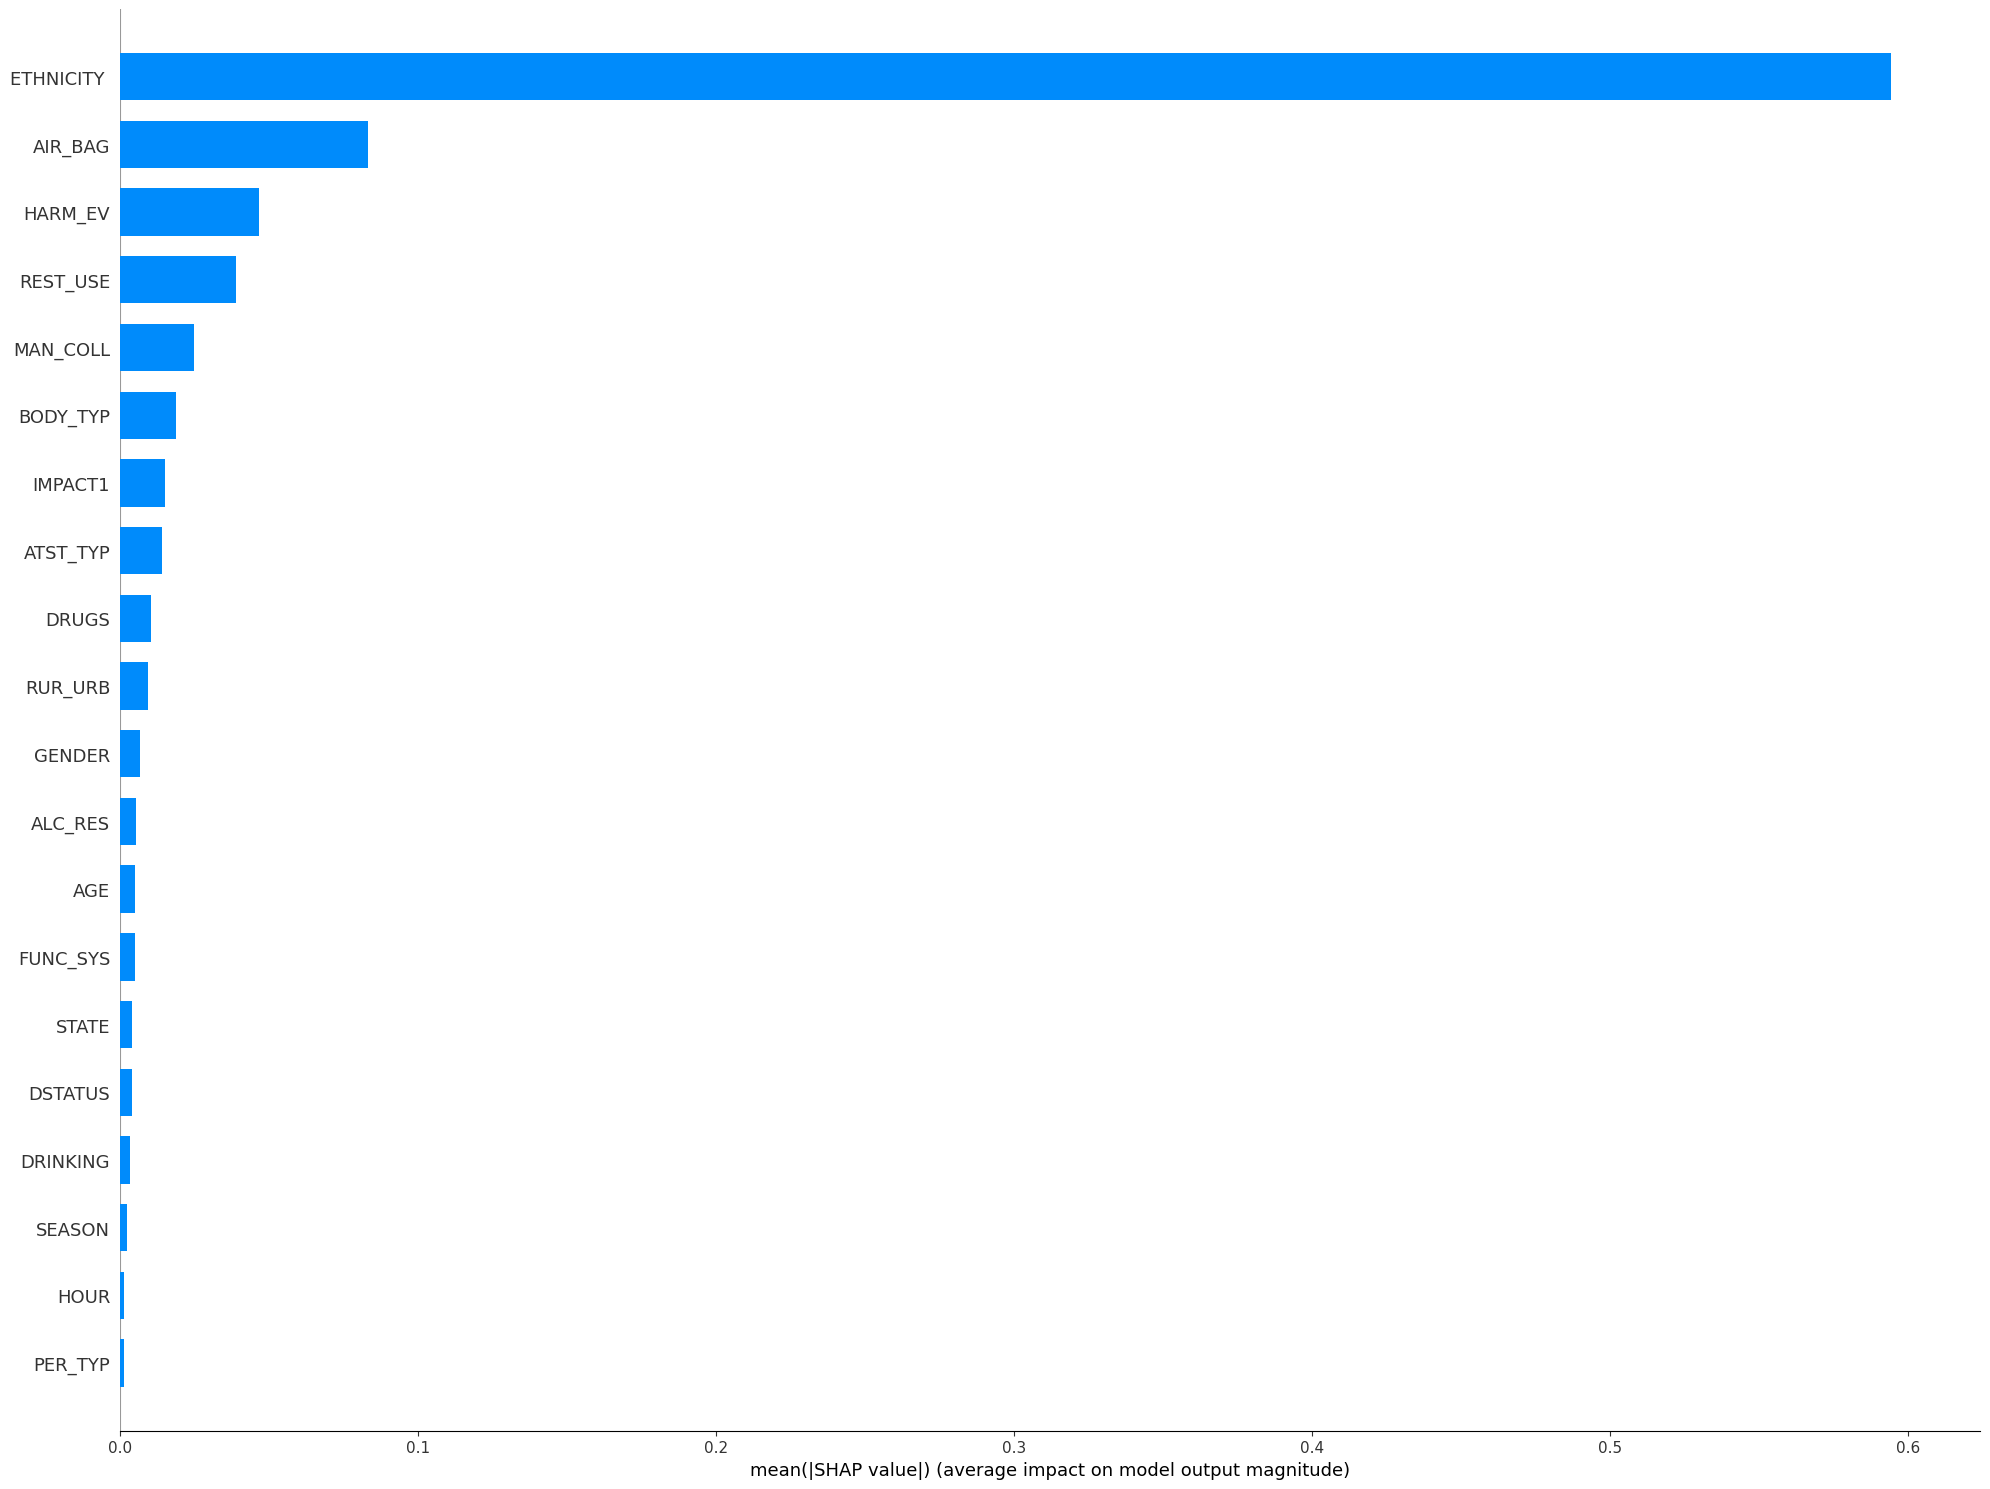

In [8]:
import shap 
explainer = shap.Explainer(model.predict,X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)

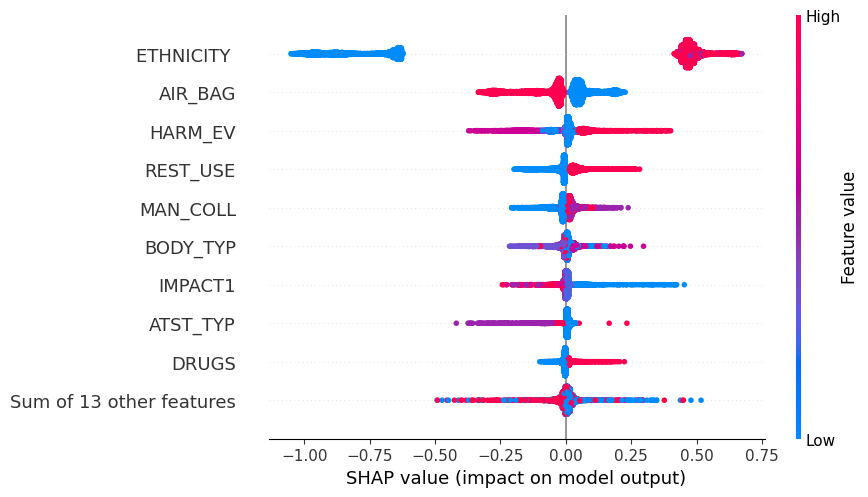

In [9]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)

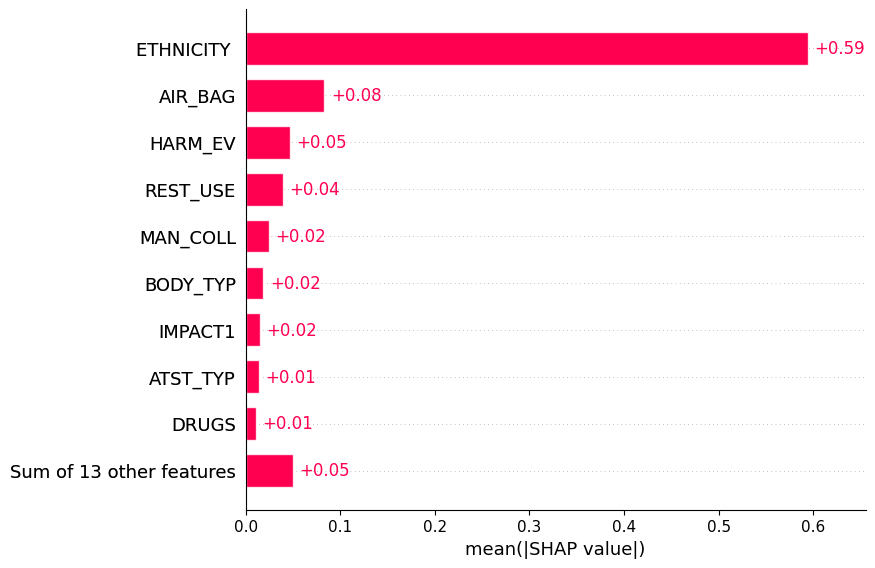

In [10]:
shap.plots.bar(explanation)

In [ ]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    shap.plots.waterfall(explanation[i], show=False)
    plt.savefig(os.path.join("shap/adaboost/waterfall", f"waterfall_{i}.png"), dpi = 300,bbox_inches="tight")
    plt.close()


In [ ]:
import matplotlib.pyplot as plt
import os

indices = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
for i in indices:
    # shap.plots.waterfall(explanation[i], show=False)
    # shap.initjs()
    shap.force_plot(shap_values[i],feature_names=['STATE', 'SEASON', 'DAY', 'HOUR', 'HARM_EV', 'MAN_COLL', 'BODY_TYP', 'AGE', 'GENDER', 'PER_TYP', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'DRINKING', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DSTATUS', 'ETHNICITY ', 'RUR_URB', 'FUNC_SYS', 'IMPACT1'], matplotlib=True, show=False)
    plt.savefig(os.path.join("shap/adaboost/force/", f"force_{i}.png"), dpi = 300,bbox_inches="tight")
    # shap.save_html(os.path.join("shap/adaboost/force/", f"force_{i}.png"), force_plot)
    plt.close()


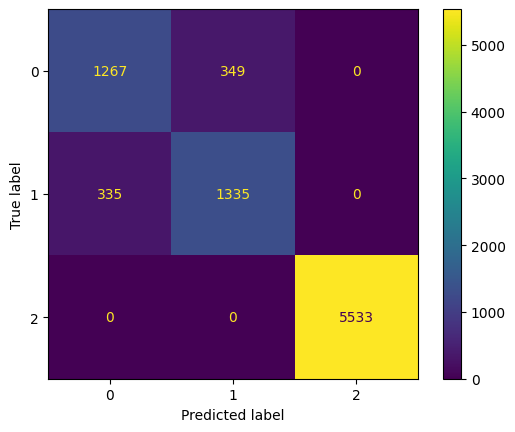

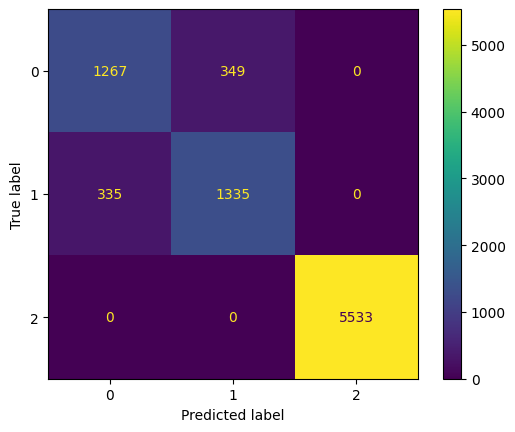

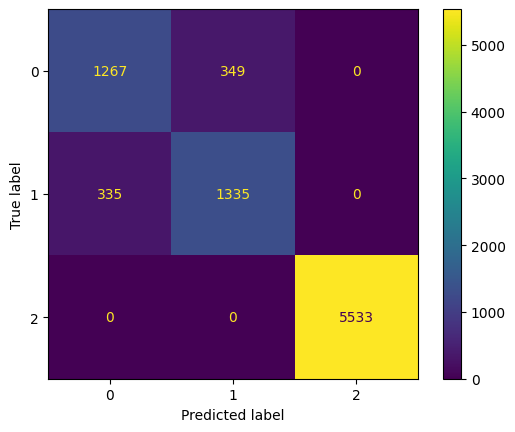

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix)
cm_display.plot()
plt.show()